In [29]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
def reader(fname):
    pattern1 = 'real\t'
    pattern2 = 'user\t'
    pattern3 = 'sys\t'
    f=open(fname)
    f1 =f.readlines()
    real=[]
    user=[]
    sys=[]
    for x in f1:
        if re.match(pattern1, x):
            t1=x.replace('real\t', '').replace('s', '')
            t2=t1.split("m")
            minutes=float(t2[0])
            seconds=float(t2[1])
            real.append( minutes*60 + seconds)


        if re.match(pattern2, x):
            t1=x.replace('user\t', '').replace('s', '')
            t2=t1.split("m")
            minutes=float(t2[0])
            seconds=float(t2[1])
            user.append( minutes*60 + seconds)

        if re.match(pattern3, x):
            t1=x.replace('sys\t', '').replace('s', '')
            t2=t1.split("m")
            minutes=float(t2[0])
            seconds=float(t2[1])
            sys.append( minutes*60 + seconds)
    return real,user,sys

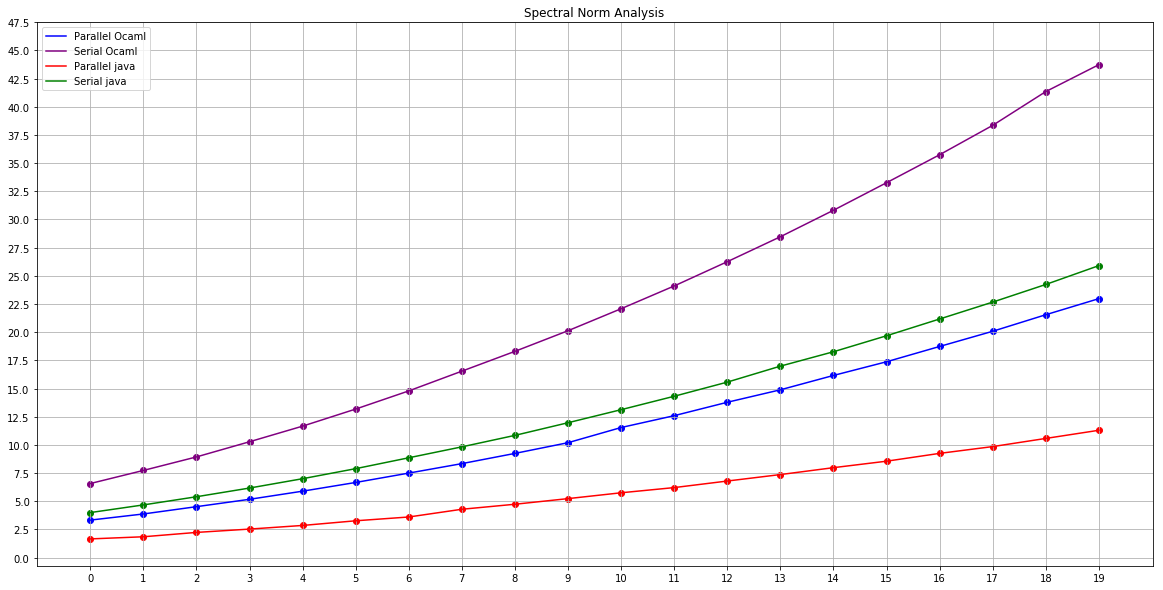

In [46]:
real1,user1,sys1=reader("output1_p.txt")
real2,user2,sys2=reader("output2.txt")
real3,user3,sys3=reader("output3_p.txt")
real4,user4,sys4=reader("output4.txt")

x = np.arange(len(user1))

user_1=[i * 0.25 for i in user1]
user_3=[i * 0.25 for i in user3]

fig= plt.figure(figsize=(20,10))

#axes= fig.add_axes([0,20,0.8,0.8])

plt.plot(x, user_1, color="blue", label='Parallel Ocaml')
plt.scatter(x, user_1, c="blue",)
plt.plot(x, user2, color='purple', label='Serial Ocaml')
plt.scatter(x, user2, color='purple')
plt.plot(x, user_3, color="red", label='Parallel java')
plt.scatter(x, user_3, color="red")
plt.plot(x, user4, color="green", label='Serial java')
plt.scatter(x, user4, color="green")

plt.grid(True)

# plt.xticks(x, x)
# plt.ylim(0,50)
plt.xticks(np.arange(0, 20, step=1))
plt.yticks(np.arange(0, 50, step=2.5))

# plt.yscale('Time in seconds')
plt.title('Spectral Norm Analysis')
plt.legend()
plt.show()

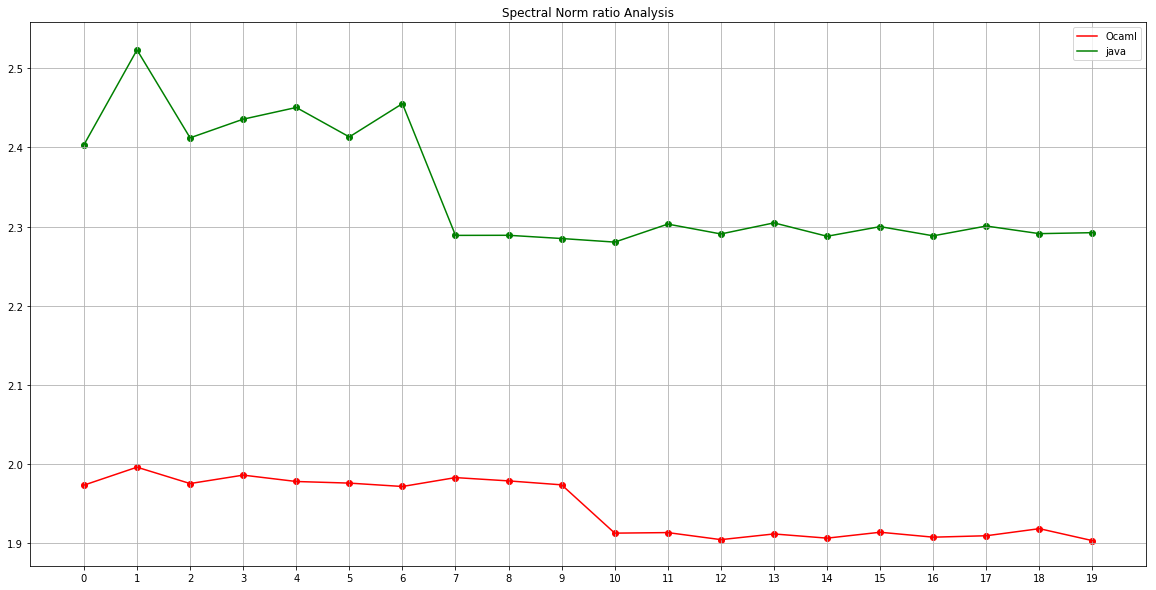

In [47]:
fig= plt.figure(figsize=(20,10))

ratio_java=[      float(user4[i])/float(user_3[i])     for i in range(len(user4))]
ratio_ocaml=[       float(user2[i])/float(user_1[i])    for i in range(len(user2))]
x1 = np.arange(len(ratio_ocaml))
plt.plot(x1, ratio_ocaml, color="red", label='Ocaml')
plt.scatter(x1, ratio_ocaml, c="red",)



plt.plot(x1, ratio_java, color="green", label='java')
plt.scatter(x1, ratio_java, c="green",)
plt.xticks(np.arange(0, 20, step=1))
plt.grid(True)
plt.title('Spectral Norm ratio Analysis')
plt.legend()
plt.show()